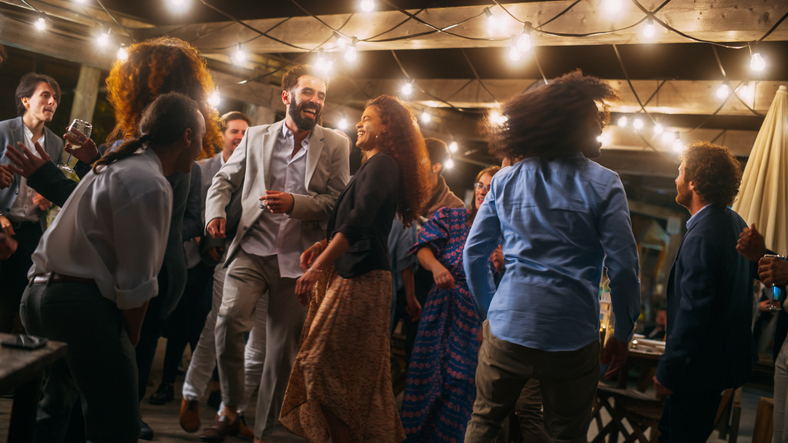

## Pre-processing

In [ ]:
#import required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Load the Dataset
df= pd.read_csv("/content/spotify.csv")
spotify = pd.read_csv('/content/spotify.csv') #Will be used at later stages

In [ ]:
#Inspecting the Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113027 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113027 non-null  object 
 1   artists           113026 non-null  object 
 2   album_name        113026 non-null  object 
 3   track_name        113026 non-null  object 
 4   popularity        113027 non-null  int64  
 5   duration_ms       113027 non-null  float64
 6   explicit          113027 non-null  bool   
 7   danceability      113027 non-null  float64
 8   energy            113027 non-null  float64
 9   key               113027 non-null  int64  
 10  loudness          113027 non-null  float64
 11  mode              113027 non-null  int64  
 12  speechiness       113027 non-null  float64
 13  acousticness      113027 non-null  float64
 14  instrumentalness  113027 non-null  float64
 15  liveness          113027 non-null  float64
 16  valence           11

In [ ]:
df.head(30)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666.0,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610.0,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826.0,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933.0,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853.0,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240.0,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400.0,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946.0,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613.0,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594.0,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


**Observations upon inspecting the dataset**
1. There are duplicated track IDs within the dataset
2. There are some missing values present in the `artists`, `album_name`,and `track_name` rows
3. There are instances of repeated song names within the dataset, where the same song from an `artist` appears multiple times under a different `track_id` and `album_name`.
4. The dataset contains tracks categorized under genres like '`kids`' and '`children`,' which may not be suitable for my target audience, as it primarily consists of adults.



In [ ]:
#Checking for duplicated `track_id` and `track_name` values**
dup_id=df['track_id'].duplicated().sum()
dup_name=df['track_name'].duplicated().sum()

print(dup_id)
print(dup_name)

24132
40091


### 1. Handling duplicated `track_id`values

In [ ]:
# Drop duplicate track_ids
df.drop_duplicates(subset='track_id', inplace=True)
spotify.drop_duplicates(subset='track_id', inplace=True)

### 2. Handling Missing values

In [ ]:
#Drop the null values in artists, album_name, track_name rows
df.dropna(inplace=True)
spotify.dropna(inplace=True)

### 3. Handling repeated song names, where the same song appears multiple times
To make things clear and avoid any confusion, we want to count each song only once, no matter how and how many times it's listed.
This way, we ensure that when we analyze the songs, we're not accidentally giving extra importance to a song just because it's listed multiple times in slightly different ways. `Deduplication` helps us keep things simple and fair by treating each song as a unique item, even if it has minor variations.

In [ ]:
# Deduplicate 'track_name'
df.drop_duplicates(subset='track_name', keep='first', inplace=True, ignore_index=False)

spotify.drop_duplicates(subset='track_name', keep='first', inplace=True,ignore_index=False)

In [ ]:
dup_nam=df['track_name'].duplicated().sum()
dup_nam


0

### 4. Handling rows with genre 'kids' or 'children' in track_genre column
Since  our audience is adults,the playlist should be in line with the age of the company's employees.

In [ ]:
# Drop rows with genre 'kids' or 'children' in track_genre column
df = df[~df['track_genre'].isin(['kids', 'children'])]
spotify= spotify[~spotify['track_genre'].isin(['kids', 'children'])]

### 5. Label Encoding the `explicit` feature
Replace the binary values "False" and "True" with the numerical labels 0 and 1, respectively.

In [ ]:
# Explicit False = 0, True = 1
df["explicit"] = df["explicit"].astype(int)
spotify["explicit"] = spotify["explicit"].astype(int)

<ipython-input-18-6aabe8322adf>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify["explicit"] = spotify["explicit"].astype(int)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71420 entries, 0 to 113026
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          71420 non-null  object 
 1   artists           71420 non-null  object 
 2   album_name        71420 non-null  object 
 3   track_name        71420 non-null  object 
 4   popularity        71420 non-null  int64  
 5   duration_ms       71420 non-null  float64
 6   explicit          71420 non-null  int64  
 7   danceability      71420 non-null  float64
 8   energy            71420 non-null  float64
 9   key               71420 non-null  int64  
 10  loudness          71420 non-null  float64
 11  mode              71420 non-null  int64  
 12  speechiness       71420 non-null  float64
 13  acousticness      71420 non-null  float64
 14  instrumentalness  71420 non-null  float64
 15  liveness          71420 non-null  float64
 16  valence           71420 non-null  float

## Results & Discussion
### 1. Descriptive Analysis
In this analysis, we will begin by examining summary statistics for all the numerical variables in the dataset with a particular emphasis on the "danceability" feature to gain insights into its distribution and characteristics
#### Summary Statistics of the Whole Dataset

In [ ]:
#Summary Statistics of the whole df
df.describe()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,71420.000000,7.142000e+04,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000,71420.000000
mean,34.630356,2.341838e+05,0.088141,0.556040,0.640240,5.298152,-8.553762,0.630230,0.088968,0.327764,0.185942,0.223293,0.464007,122.262420,3.923355
std,19.200029,1.190267e+05,0.283501,0.176332,0.257938,3.554929,5.292041,0.482746,0.116728,0.338882,0.332188,0.201629,0.262554,30.203471,0.363956
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.759860e+05,0.000000,0.444000,0.463000,2.000000,-10.390000,0.000000,0.036100,0.015200,0.000000,0.098900,0.243000,99.269750,4.000000
50%,35.000000,2.173730e+05,0.000000,0.570500,0.684000,5.000000,-7.230000,1.000000,0.049100,0.188000,0.000096,0.135000,0.451000,122.299500,4.000000
75%,49.000000,2.699615e+05,0.000000,0.687000,0.861000,8.000000,-5.120000,1.000000,0.087200,0.624000,0.162000,0.289000,0.676000,140.354750,4.000000
max,100.000000,5.237295e+06,1.000000,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [ ]:
# Calculate descriptive statistics for the danceability feature
df['danceability'].describe()

count    71420.000000
mean         0.556040
std          0.176332
min          0.000000
25%          0.444000
50%          0.570500
75%          0.687000
max          0.985000
Name: danceability, dtype: float64

**Observations**
- The min danceability score is 0.000000
- The max danceability score is 0.985000
- The mean danceability score is 0.556040


### 2. Correlation Analysis
The goal is to quantify the degree of association or dependence between pairs of numerical variables in the dataset.This analysis will help us discern if there are any significant associations, both positive and negative, between variables, shedding light on potential patterns or dependencies present in the _data._

<ipython-input-22-ee2b64c2b440>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True,cmap = 'GnBu')


<Axes: >

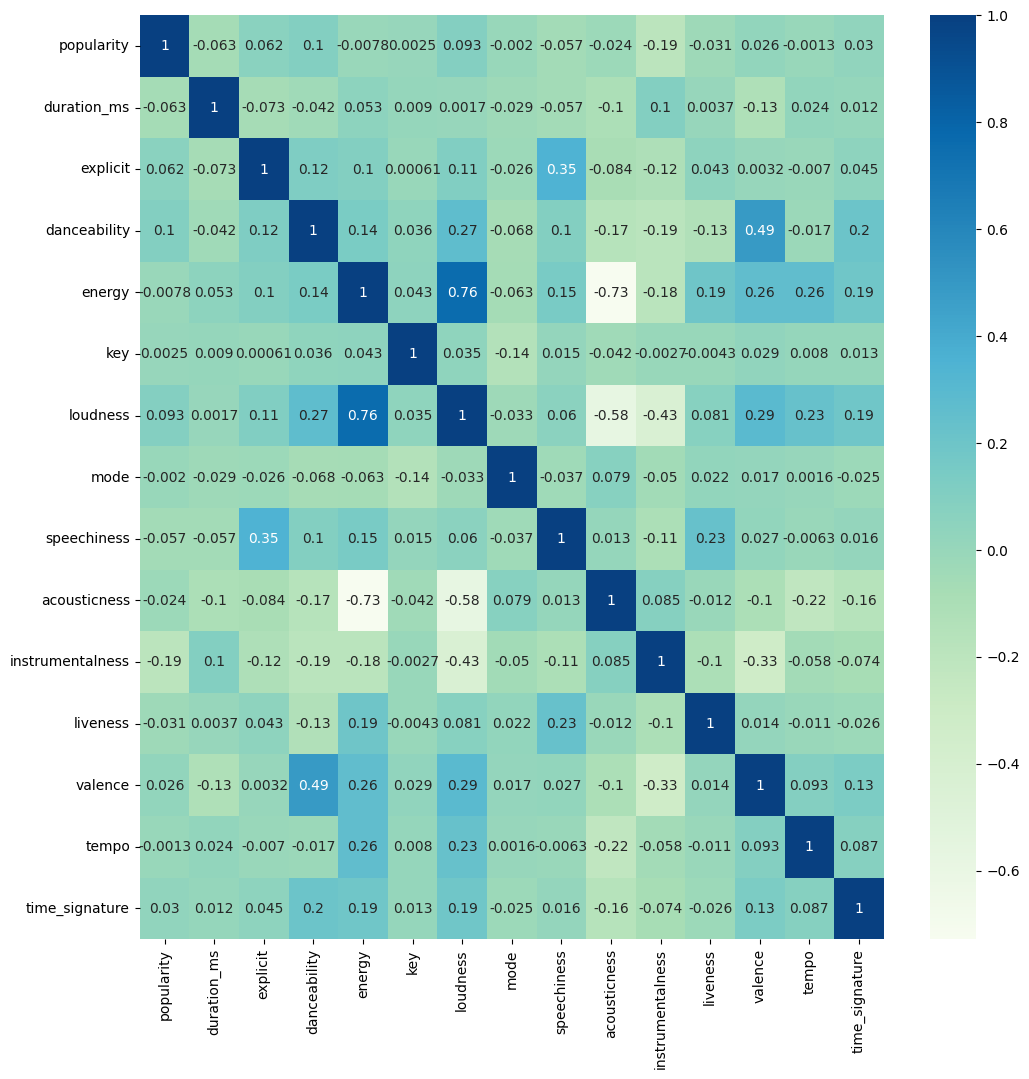

In [ ]:
# Calculate and Visualize the correlation between danceability and other features
plt.figure(figsize = (12,12))
sns.heatmap(df.corr(),annot = True,cmap = 'GnBu')

**Observations from the correlation matrix:**

- Energy and Loudness have a high correlation. Considering a correlation coefficient of `>=0.65` as high, we can conclude that Energy and Loudness are strongly positively correlated. This indicates that the more popular tracks tend to have higher energy and valence scores.
- It is important to note that correlation does not imply causation. While a high correlation suggests a relationship between two variables, it does not necessarily mean that one variable causes the other to change.

We will then sort the features based on their correlation values with danceability in descending order, to determine the top 5 features that have a noteworthy impact on whether people are likely to perceive the song as more or less danceable.

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Sort the correlation values for danceability in descending order
danceability_correlation = correlation_matrix['danceability'].sort_values(ascending=False)

# Print the features that are most relevant to danceability
print(danceability_correlation)

danceability        1.000000
valence             0.487426
loudness            0.269716
time_signature      0.204232
energy              0.139351
explicit            0.120514
popularity          0.101258
speechiness         0.100860
key                 0.036045
tempo              -0.016977
duration_ms        -0.041919
mode               -0.067760
liveness           -0.132149
acousticness       -0.165880
instrumentalness   -0.186654
Name: danceability, dtype: float64


<ipython-input-23-b0f6fb6eb8ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


**The top 5 features correlated with danceability are:**
1. valence
2. loudness
3. time_signature
4. energy   
5. explicit           

### 3. Univariate analysis
Now that we know the features that are most relevant to danceability and the overall vibe of a dance track, we can perform EDA on them.

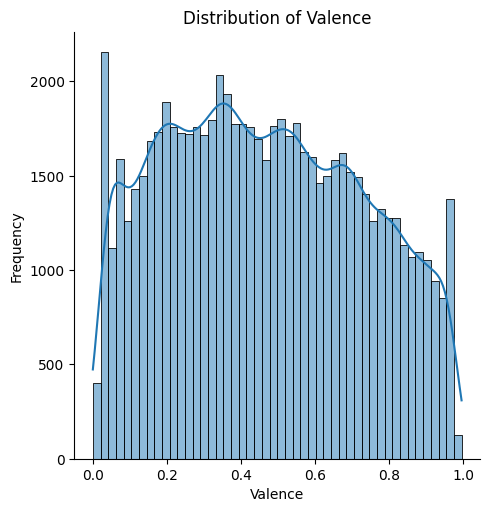

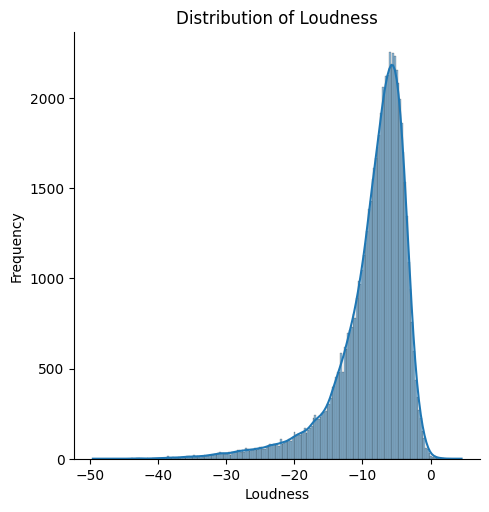

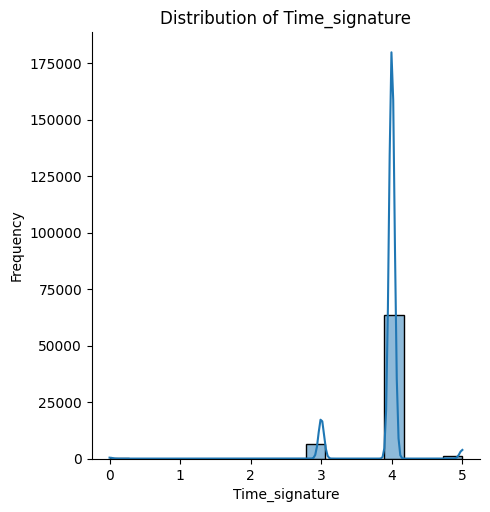

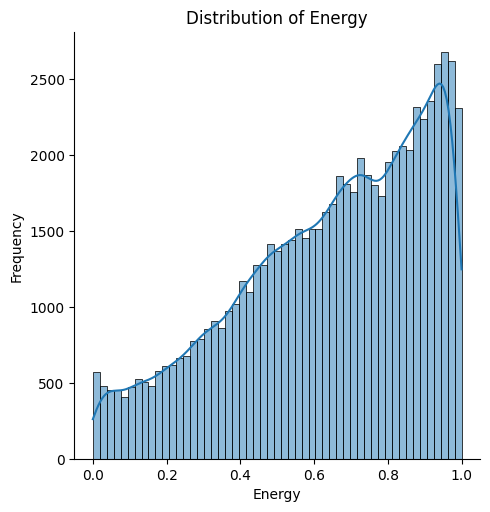

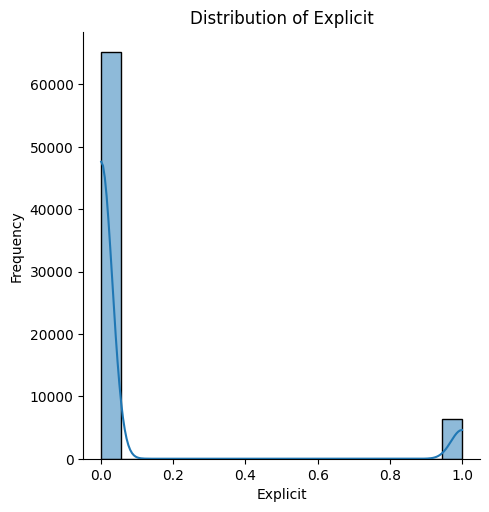

In [ ]:
# Define the columns
columns_to_plot = ['valence', 'loudness', 'time_signature', 'energy', 'explicit']

# Loop through each column and create a distribution plot
for column in columns_to_plot:
    sns.displot(df[column], kde=True)
    plt.xlabel(column.capitalize())  # Capitalize the column name for the x-axis label
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

**Observations**

1. Valence:
   - Valence represents the musical positiveness conveyed by a track. The distribution is **skewed to the right**, **indicating that a larger number of tracks have higher valence values**. This suggests that dance tracks tend to have a positive valence, aligning with the preference for an upbeat and happy vibe.

2. Loudness:
   - Loudness measures the overall volume of a track. The distribution of loudness values shows that **most tracks have a moderate to high loudness level, suggesting a preference for energetic and impactful dance tracks**.

3. Time Signature:
   - Time signature indicates the number of beats in each bar of music. The distribution of time signature values shows that the **majority of tracks have a time signature of 4**, which is the most common time signature in popular music.

4. Energy:
   - Energy represents the intensity and activity level of a track. The distribution of energy values shows that **most tracks have a moderate to high energy level, indicating a preference for energetic and lively dance tracks**.
 5. Explicit:
    - The distribution of the 'explicit' feature reveals that the majority of songs in the dataset do not contain explicit lyrics. Specifically, the data shows a significantly higher count of songs with a 'False' value (indicating non-explicit content, coded as 0) compared to those with a 'True' value (indicating explicit content, also coded as 0).

Overall, the Univariate Analysis provides a glimpse into the characteristics of dance tracks, highlighting the preference for **positive valence, moderate to high loudness, a time signature of 4, moderate to high energy levels and no explicit lyrics.**

### 4. **Model Development**
Three different regression models are used for the purpose of model comparison and selection: **Linear Regression**, **Decision Tree Regression (CART)**, and **Random Forest Regression**.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Drop all string features
df = df.select_dtypes(exclude=['object'])

# Split the data into training and testing sets
X = df.drop(columns=['danceability'])
y = df['danceability']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Shape of X_train",X_train.shape)
print("Shape of X_test",X_test.shape)
print("Shape of y_train", y_train.shape)
print("Shape of y_test", y_test.shape)




Shape of X_train (49994, 14)
Shape of X_test (21426, 14)
Shape of y_train (49994,)
Shape of y_test (21426,)


#### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Choose and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict danceability for the test set
y_pred = model.predict(X_test)

# Evaluate the model on the test set
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


Mean Squared Error (MSE): 0.01992591880453983
Mean Absolute Error (MAE): 0.11287481433496896
R-squared (R2): 0.36278837373242756


#### Decision Tree Regression (CART)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a Decision Tree Regressor model
model_dt = DecisionTreeRegressor()
model_dt.fit(X_train, y_train)

# Predict danceability for the test set
y_pred_dt = model_dt.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Mean Squared Error (MSE): {mse_dt}")
print(f"Mean Absolute Error (MAE): {mae_dt}")
print(f"R-squared (R1): {r2_dt}")

Mean Squared Error (MSE): 0.024956239468869594
Mean Absolute Error (MAE): 0.12189347521702605
R-squared (R1): 0.2019235803641718


#### Random Forest Regression

In [ ]:
# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Predict danceability for the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error (MSE): {mse_rf}")
print(f"Mean Absolute Error (MAE): {mae_rf}")
print(f"R-squared (R2): {r2_rf}")

Mean Squared Error (MSE): 0.01176043227355274
Mean Absolute Error (MAE): 0.0849324714365724
R-squared (R2): 0.6239127415829471


#### Goodness of Fit
Based on the performance metrics calculated for each of the three models (Linear Regression, Decision Tree Regression, and Random Forest Regression) on the test dataset, **Random Forest Regression** appears to be the best-performing model for predicting danceability in this dataset. It has significantly  **lower errors (MSE and MAE)** and **the highest R-squared**, suggesting that it provides the most accurate and explanatory predictions.

#### Visualising the Random Forest Regression results

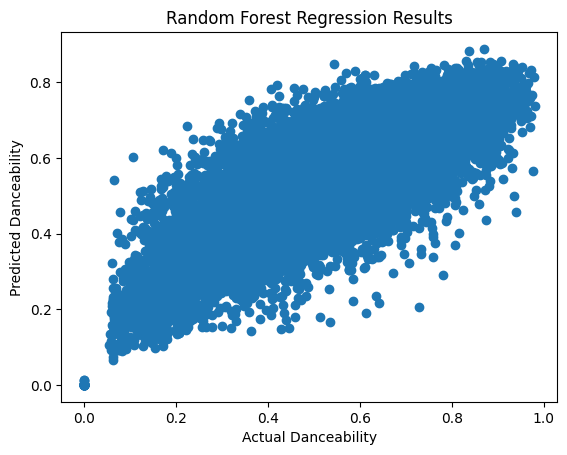

In [ ]:
import matplotlib.pyplot as plt

# Plot the predicted values against the actual values
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Danceability')
plt.ylabel('Predicted Danceability')
plt.title('Random Forest Regression Results')
plt.show()

### 5. Model  Interpretation

Random Forest provide information about feature importance, helping to identify which features have the most influence on the target variable.

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_

# Get feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print feature importance rankings
for i in range(len(feature_names)):
    print(f"{i+1}. {feature_names[indices[i]]}: {importances[indices[i]]}")

1. valence: 0.2785345876440868
2. tempo: 0.1382765768517997
3. acousticness: 0.10971673173794856
4. loudness: 0.08492347522726645
5. speechiness: 0.08457285717994
6. energy: 0.0639015547437698
7. duration_ms: 0.05862185271647503
8. liveness: 0.05486233373918378
9. popularity: 0.042502991315838436
10. instrumentalness: 0.041995143865244645
11. key: 0.018374538993462253
12. time_signature: 0.01409984753468415
13. explicit: 0.005068702123843264
14. mode: 0.004548806326457034


**Visualizing Feature Importances**

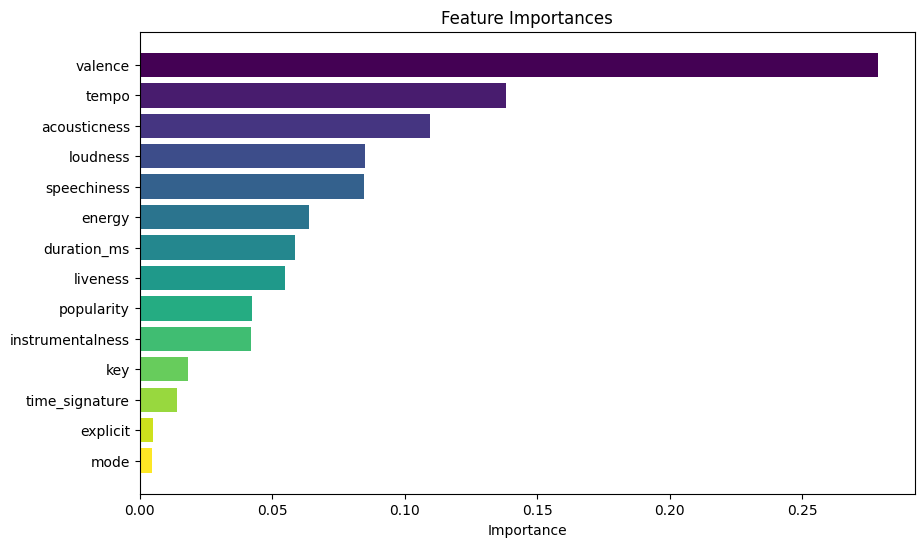

In [ ]:
# Get feature importances
importances = rf_model.feature_importances_
feature_names = X.columns

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Create a color map for bars
colors = plt.cm.viridis(np.linspace(0, 1, len(importances)))

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), importances[indices], color=colors)

# Invert the y-axis to have the most important feature at the top
plt.gca().invert_yaxis()

plt.yticks(range(len(feature_names)), feature_names[indices])
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.show()

Key Feature Insights:

The most influential features for predicting danceability are **valence**, **tempo**, **acousticness, speechiness**, and **loudness**.

- **Valence**: Indicates musical positiveness. Higher values contribute to a more positive and cheerful vibe, ideal for dancing.

- **Tempo**: Reflects the track's pace. Higher tempo means a faster, more energetic track, crucial for dance playlists.

- **Acousticness**: Lower values indicate a significant presence of electronic or synthesized elements, such as synthesizers, drum machines, and digital effects, common in dance music genres.

- **Speechiness**: Lower values indicate fewer vocals, letting the rhythm shine.

- **Loudness**: Higher loudness creates an energetic and immersive experience.


In contrast, **explicit** and **mode** have minimal impact on danceability prediction.

- **Explicit**: Content explicitness may not be crucial for dance playlists.

- **Mode**: Modality (major or minor) may not directly affect danceability.

### 6. Playlist Curation

**Step 1.
Using the trained Random Forest model, predict danceability scores for all tracks in the dataset**

In [ ]:
# Predict danceability scores for all tracks
all_predictions = rf_model.predict(X)
df['predicted_danceability'] = all_predictions

**Step 2.
Select the top 50 tracks with the highest predicted danceability scores**

In [ ]:
# Select top 50 tracks with highest predicted danceability scores and order them in descending order
top_tracks = df.nlargest(50, 'predicted_danceability').sort_values('predicted_danceability', ascending=False)
top_tracks

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,predicted_danceability
21223,45,215700.0,0,0.947,0.805,11,-4.192,0,0.2960,0.008000,0.000000,0.0805,0.637,99.998,4,0.92461
13395,9,223920.0,0,0.969,0.664,4,-8.638,0,0.3270,0.011400,0.351000,0.0778,0.736,127.097,4,0.92228
72746,49,412133.0,0,0.982,0.478,5,-7.658,0,0.2020,0.118000,0.740000,0.1120,0.567,122.007,4,0.92193
21433,50,215700.0,1,0.947,0.806,11,-4.191,0,0.2960,0.008150,0.000000,0.0811,0.634,99.999,4,0.92164
20878,44,215700.0,0,0.944,0.808,11,-4.167,0,0.2930,0.008000,0.000000,0.0811,0.660,99.991,4,0.91797
13863,7,332000.0,0,0.948,0.912,1,-11.146,1,0.2090,0.007930,0.867000,0.1030,0.759,122.980,4,0.91669
13359,7,487933.0,0,0.961,0.235,0,-11.005,1,0.4150,0.001740,0.000298,0.0758,0.539,121.058,4,0.91612
8849,31,290240.0,0,0.967,0.666,7,-4.065,1,0.1610,0.177000,0.000748,0.0512,0.897,116.013,4,0.91588
39295,42,218417.0,1,0.962,0.596,10,-7.207,0,0.2640,0.068000,0.000010,0.1060,0.705,128.004,4,0.91497
110673,19,232853.0,0,0.985,0.651,9,-5.620,0,0.2170,0.001210,0.176000,0.0640,0.405,115.347,4,0.91391


In [ ]:
#Display the index values of top_tracks to help identify the specific tracks selected
index = top_tracks.index

for i in index:
    print(i)

21223
13395
72746
21433
20878
13863
13359
8849
39295
110673
13213
60372
37629
35955
111823
47755
36115
39401
13241
68132
33646
20484
24605
72804
21325
24672
8680
37659
106336
17687
111293
21628
53259
87888
93277
105440
69148
37195
32660
21288
73205
37352
60450
21329
48052
32770
15873
13508
105833
51001


**Step 3. Playlist Compilation**

In [ ]:
# Select the top 50 tracks with highest predicted danceability scores in the original df using their indexes
top_tracks_info = spotify.loc[index]

In [ ]:
# Final Summarized list
selected_columns = ['track_id', 'artists', 'album_name', 'track_name', 'track_genre']
selected_df = top_tracks_info[selected_columns]
selected_df

,track_id,artists,album_name,track_name,track_genre
21223,1jbLkcfE9VrWI3wCZaZU61,DeeWunn;Marcy Chin,Bunx Up (feat. Marcy Chin),Bunx Up,dancehall
13395,62r9wDRSKAyY6xWBh58bu7,Armando,100 % of Disin U - Remixes,100% of Disin' You,chicago-house
72746,0VomrCFhqYNVuhfIRPLeVa,Oliver Schories,Fields Without Fences,Daily Routines,minimal-techno
21433,5s6YxDJaHIz08u1Wj0KGnZ,DeeWunn;Marcy Chin,Mek it Bunx Up (feat. Marcy Chin) - Single,Mek It Bunx Up,dancehall
20878,1FJbjoaBvA9Ci5oCOuaxLf,DeeWunn;Marcy Chin,Bunx Up [The Official Street LP],Mek It Bunx Up (feat. Marcy Chin),dancehall
13863,7L1EyPOoOakTFWjIlAveRP,Jovonn;DJ Deep,Back in the Dark,Back in the Dark - Dub Mix,chicago-house
13359,4uPQOi5PQapwSbMs97LcJG,Romanthony;Kevin McKay,"Let Me Show You Love (Classic 12"")",Let Me Show You Love - Kevin McKay's Luv101 Edit,chicago-house
8849,6qyKoY9CfXWP8arx6JDum6,Bigg Robb;Mz Jackson,Juke Joint Music,Sugar Shack (Line Dance Remix) (feat. Mz Jackson),blues
39295,5u7QargOKXO82nXcAU9s8L,PA69,Biertornado,Biertornado,german
110673,4xKKIS9g9nivSiE7TtgR6V,Quantic,The Best of Quantic,Sol Clap,trip-hop


In [ ]:
genre_counts=top_tracks_info['track_genre'].value_counts()
genre_unique=top_tracks_info['track_genre'].nunique()

artist_counts=top_tracks_info['artists'].value_counts()
artists_unique=top_tracks_info['artists'].nunique()

print("unique genres", genre_unique)
print(genre_counts)
print("Unique artists",artists_unique)
print(artist_counts)

unique genres 25
dancehall         7
chicago-house     6
funk              4
minimal-techno    3
turkish           2
swedish           2
detroit-techno    2
hardcore          2
emo               2
french            2
j-dance           2
german            2
blues             2
latino            1
trip-hop          1
dance             1
synth-pop         1
club              1
house             1
reggae            1
sad               1
malay             1
electronic        1
chill             1
hip-hop           1
Name: track_genre, dtype: int64
Unique artists 48
DeeWunn;Marcy Chin                                   3
Armando                                              1
Zackey Force Funk                                    1
DJ LILMAN;West End Tricks                            1
Ati242                                               1
NSG                                                  1
Timeflies                                            1
Bob Marley & The Wailers                        

#### Conclusions
- The "Dancehall" genre is the most represented in the playlist, with a total of 7 songs, followed closely by "Chicago-house" with 6 songs. This aligns with the goal of creating a dance-themed playlist as both genres are known for their danceable tunes.
- Among the artists featured, "DeeWunn" and "Marcy Chin" have a significant presence, contributing a total of 3 songs to the playlist.
- In terms of diversity, the playlist encompasses a wide range of music genres, with a total of 25 unique genres represented. Additionally, it includes tracks from 48 unique artists. This diversity in both genres and artists ensures a well-rounded and appealing mix for a 50-song playlist, catering to various musical tastes and ensuring an enjoyable experience at the company's summer party.

#### Recommendations
1. **Regularly update the data:** To keep the playlist fresh and aligned with evolving musical preferences, consider updating it periodically since the data collection was concluded in October 2022. This ensures that the music remains engaging and appealing to a diverse audience over time.
2. **Feedback Collection:** After the summer party, gather feedback from attendees to understand which songs were particularly well-received and which ones could be improved. Use this feedback to refine future playlists.
3. **Theme Variation:** While this playlist focused on dance-themed music, consider creating playlists with different themes for future events. This adds variety and caters to different moods and occasions.
4. **Cross-Genre Selection:** Experiment with mixing genres to create unique and unexpected song transitions within the playlist. This can add an element of surprise and excitement to the music selection.
5. **Consider Cultural Sensitivity:** Be mindful of the cultural backgrounds and sensitivities of the attendees when selecting songs. Ensure that the music selection is inclusive and respectful of diverse cultures and preferences.